In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [45]:
def plot_series(data, x_lab, y_lab, title, file_name, loc, scatter=False, grid=False):
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 8, forward=True)

  for d in data:
    if scatter:
      plt.scatter(d[0], d[1], alpha=0.8, label=d[2])
    else:
      plt.plot(d[0], d[1], alpha=0.8, label=d[2])

  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.title(title)
  plt.legend(loc=loc, prop={'size': 16})
  if grid:
    # plt.grid(axis='x', color='0.95')
    # plt.grid(axis='x', which='major', color='k', linestyle='-')
    plt.grid(axis='x', which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(axis='x', which='minor', color='r', linestyle='-', alpha=0.2)
    plt.minorticks_on()

  plt.savefig(f'./visualization/mnist/{file_name}.pdf', dpi=300, transparent=True)
  plt.show()

In [46]:
# full = np.load("./tmp/mnist_1.0_grd_normw_5.npz")
# random = np.load("./tmp/mnist_0.5_random_wor_5.npz")
# craig = np.load("./tmp/mnist_0.5_grd_normw_5.npz")

full = np.load("./tmp/mnist_30E_1.0_grd_normw_5.npz")
random = np.load("./tmp/mnist_30E_0.5_random_wor_5.npz")
craig = np.load("./tmp/mnist_30E_0.5_grd_normw_5.npz")

craig['grd_time']

array([[ 8.96304417, 10.36819506, 10.52662873, 13.72311187, 14.19767022,
        13.87120318, 12.87307763, 12.42005968, 12.34683704, 12.90866828,
        12.21817827, 11.77470469, 10.58381557, 10.78669548, 11.021065  ,
        10.04403424, 10.47860622, 10.26215959, 10.33851409, 10.58404994,
        10.55142093,  9.98295069, 10.62195301,  9.36922789,  9.94192958,
         9.88449144,  9.24048519,  9.71767187,  9.47147727,  9.63468051],
       [13.43967032,  9.82621288,  9.3327992 ,  9.43603539,  9.11005783,
         9.39978623,  9.25729537,  8.94130778,  9.35107708,  8.92723298,
         8.83728027,  8.75332212,  9.10557342,  8.92945862,  8.79231596,
         9.20387554,  8.89401054,  8.76736927,  8.97232413,  8.70594144,
         8.97891235,  8.70064092,  8.75821996,  8.56248021,  8.19098091,
         8.65771079,  8.9196074 ,  8.67548633,  8.29104257,  8.67536306],
       [10.7354548 ,  9.00594544,  9.17735171,  8.78991604,  8.38589931,
         8.29910803,  8.38126373,  8.15330124,  9

In [55]:
epochs = 30
runs = 5

full_acc = []
random_acc = []
craig_acc = []

full_time = np.zeros(epochs)
random_time = np.zeros(epochs)
craig_time = np.zeros(epochs)

full_acc_avg = []
random_acc_avg = []
craig_acc_avg = []

full_time_cum = []
random_time_cum = []
craig_time_cum = []

for run in range(runs):
    full_acc_avg.append(full['test_acc'][run])
    random_acc_avg.append(random['test_acc'][run])
    craig_acc_avg.append(craig['test_acc'][run])
    
    #cumilative sum of time
    full_time_cum.append(full['train_time'][run] + full['grd_time'][run] + full['sim_time'][run])
    random_time_cum.append(random['train_time'][run]+random['grd_time'][run]+random['sim_time'][run]+random['pred_time'][run])
    craig_time_cum.append(craig['train_time'][run]+craig['grd_time'][run]+craig['sim_time'][run]+craig['pred_time'][run])
    
#     full_time_cum.append(full['train_time'][run])
#     random_time_cum.append(random['train_time'][run])
#     craig_time_cum.append(craig['train_time'][run])
    
full_acc = np.array(full_acc_avg).mean(axis=0)
random_acc = np.array(random_acc_avg).mean(axis=0)
craig_acc = np.array(craig_acc_avg).mean(axis=0)
    
full_time_cum = np.array(full_time_cum).mean(axis=0)
random_time_cum = np.array(random_time_cum).mean(axis=0)
craig_time_cum = np.array(craig_time_cum).mean(axis=0)

for epoch in range(epochs):
    full_time[epoch] = full_time_cum[:epoch+1].sum()
    random_time[epoch] = random_time_cum[:epoch+1].sum()
    craig_time[epoch] = craig_time_cum[:epoch+1].sum()
        
        
print(full_time_cum, full_time)
print(random_time_cum, random_time)
print(craig_time_cum, craig_time)
print(full_acc)
print(random_acc)
print(craig_acc)

[2.53462143 2.43413196 2.43446202 2.43221722 2.43493595 2.43277259
 2.43405948 2.43387766 2.43454046 2.43245115 2.43587899 2.43275127
 2.43343086 2.43315072 2.43507028 2.43294649 2.4341064  2.43216848
 2.43503447 2.43222365 2.43360248 2.43114109 2.43339548 2.43375425
 2.43311276 2.43285985 2.43269877 2.43232131 2.43274918 2.43129082] [ 2.53462143  4.96875339  7.40321541  9.83543262 12.27036858 14.70314116
 17.13720064 19.5710783  22.00561876 24.43806992 26.87394891 29.30670018
 31.74013104 34.17328176 36.60835204 39.04129853 41.47540493 43.90757341
 46.34260788 48.77483153 51.20843401 53.6395751  56.07297058 58.50672483
 60.9398376  63.37269745 65.80539622 68.23771753 70.67046671 73.10175753]
[2.53012018 1.21682472 1.21627412 1.21604266 1.21635699 1.21609282
 1.21584077 1.21602869 1.21730218 1.21539412 1.21607375 1.21621857
 1.2153636  1.21601086 1.21592994 1.21597719 1.21517267 1.21619449
 1.21561146 1.21622705 1.21529803 1.21595421 1.21603546 1.21534147
 1.21531119 1.21570177 1.21559

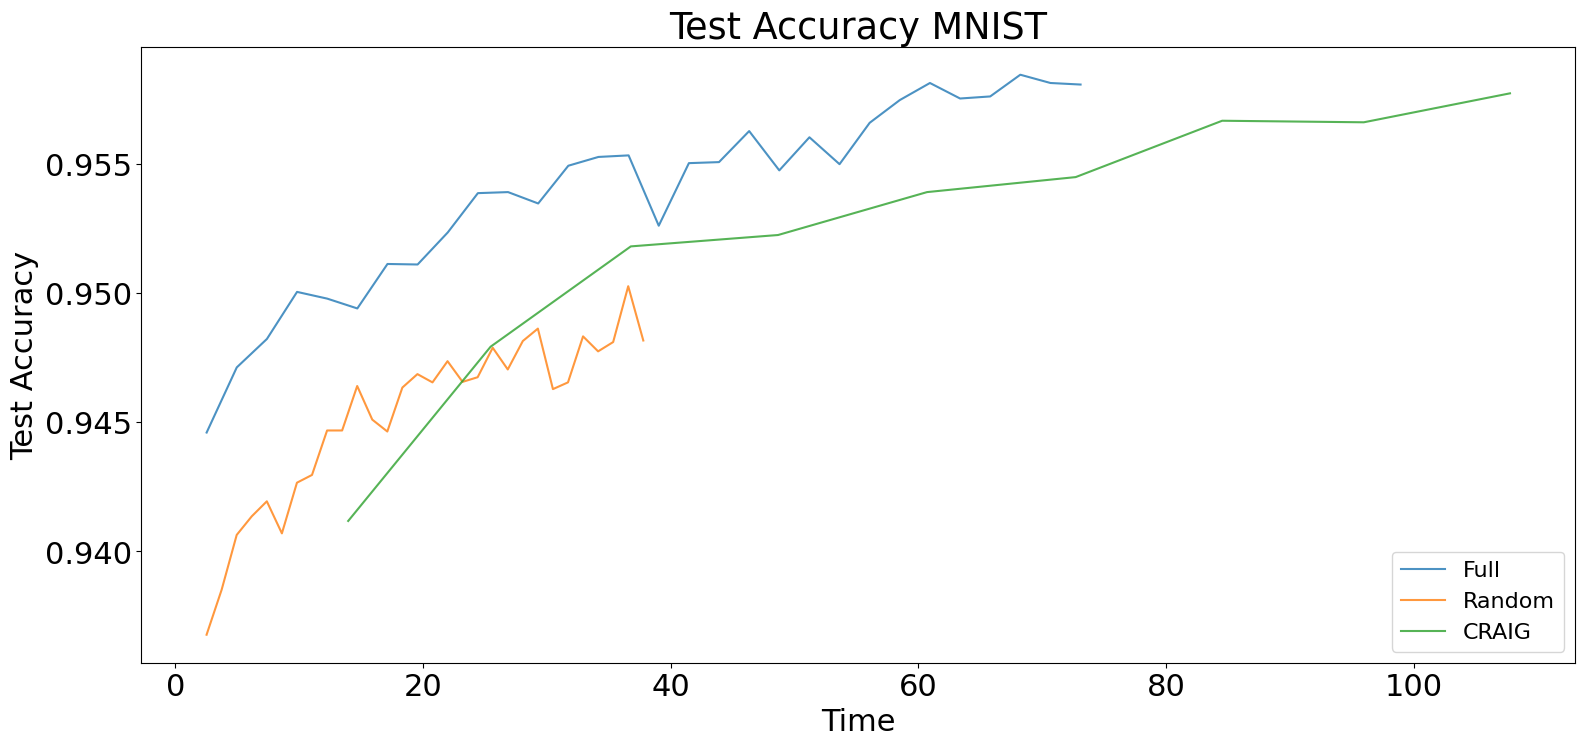

In [58]:
series_list = [
#     (full_time[:int(epoch/2)], full_acc[:int(epoch/2)], "Full"),
    (full_time, full_acc, "Full"),
    (random_time, random_acc, "Random"),
    (craig_time[:int(epoch/3)], craig_acc[:int(epoch/3)], "CRAIG")
]

plt.rcParams.update({'font.size': 22})

plot_series(data=series_list, x_lab="Time", y_lab="Test Accuracy",
            title="Test Accuracy MNIST", file_name=f"mnist_{epochs}_{runs}", 
            loc="lower right")